In [44]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [45]:
from pandas.io.parsers.readers import read_csv
from google.colab import files
file=files.upload()
df=pd.read_csv("Walmart.csv")
stores = pd.read_csv("stores.csv")
df.head()

Saving stores.csv to stores (4).csv
Saving Walmart.csv to Walmart (4).csv


Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [46]:
# Extracting Year,Month and Day from Date
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] =df['Date'].dt.day_name() 

In [47]:
# Inserting Special Events occured between 2010 and 2013
data = {
    'Event' : ['Super Bowl','Super Bowl','Super Bowl','Super Bowl',
               'Labour Day','Labour Day','Labour Day','Labour Day',
               'Thanksgiving','Thanksgiving','Thanksgiving','Thanksgiving',
               'Christmas','Christmas','Christmas','Christmas'],
    'Date' : ['12-02-2010', '11-02-2011', '10-02-2012', '8-02-2013',
              '10-08-2010', '9-08-2011', '7-08-2012', '6-08-2013',
              '26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013',
              '31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']}

Event_data= pd.DataFrame(data, columns=['Event','Date'])
Event_data['Date'] = pd.to_datetime(Event_data['Date'])

Event_data.head()

Event       Date
0  Super Bowl 2010-12-02
1  Super Bowl 2011-11-02
2  Super Bowl 2012-10-02
3  Super Bowl 2013-08-02
4  Labour Day 2010-10-08

In [48]:
# Merging Stores and Events information with Walmart dataset
df = pd.merge(df, Event_data , how = 'left', on = 'Date')
df = pd.merge(df, stores , how = 'left', on = 'Store')
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month       Day       Event Type    Size  
0  211.096358         8.106  2010      5    Sunday         NaN    A  151315  
1  211.242170         8.106  2010     12  Thursday  Super Bowl    A  151315  
2  211.289143         8.106  2010      2    Friday         NaN    A  151315  
3  211.319643         8.106  2010      2    Friday         NaN    A  151315  
4  211.350143         8.106  2010      5    Monday         NaN    A  151315

# **Data Exploration**

In [49]:
df.shape

(6435, 14)

In [50]:
#Checking Nulls in dataset
df.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Holiday_Flag       0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
Year               0
Month              0
Day                0
Event           6120
Type               0
Size               0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Day           6435 non-null   object        
 11  Event         315 non-null    object        
 12  Type          6435 non-null   object        
 13  Size          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5), object(3)
memory usage: 754.1+ KB


In [52]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment         Year        Month           Size  
count  6435.000000   6435.000000  6435.000000  6435.000000    6435.000000  
mean    171.578394      7.999151  2010.965035     6.475524  130287.600000  
std      39.356712      1.875885     0.797019     3.321797   63117.022465  
min     126.064000      3.879000  2010.000000     1.000000   34875.000000  
25%     131.735000      6.891000  2010.000000     4.000000   70713.000000  
50%     182.616521      7.874000  2011.000000     6.000000  126512.000000  
75%     212.743293      8.622000  2012.000000     9.000000  202307.000000  
max     227.232807     14.313000  2012.000000    12.000000  219622.000000

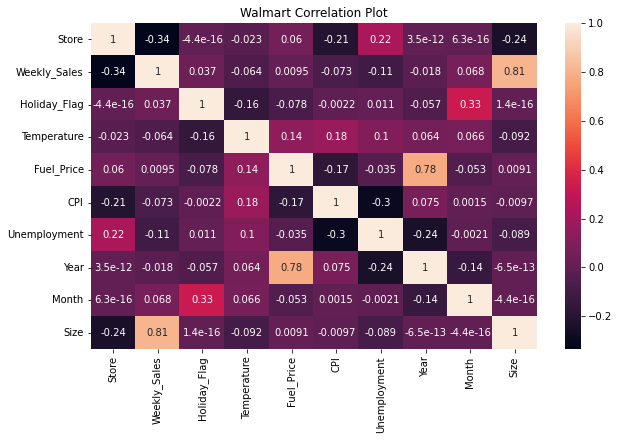

In [53]:
# Correlation plot 
fig, ax = plt.subplots(figsize=(10, 6))
dfcorr=df.corr()
sns.heatmap(dfcorr, annot=True).set(title="Walmart Correlation Plot");

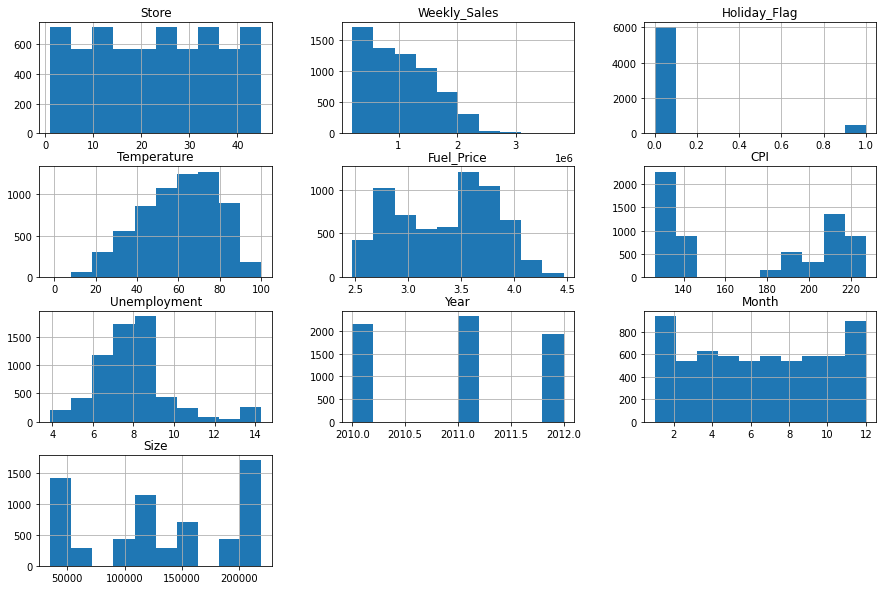

In [54]:
# Distribution of Numerical Varibales
df.drop(columns='Date').hist(figsize=(15,10));

In [55]:
# Distribution of Categorical Varibales
print(df['Holiday_Flag'].value_counts())
print(df['Type'].value_counts())
print(df['Day'].value_counts())
print(df['Event'].value_counts())

0    5985
1     450
Name: Holiday_Flag, dtype: int64
A    3146
B    2431
C     858
Name: Type, dtype: int64
Friday       4320
Monday        495
Thursday      450
Sunday        405
Tuesday       405
Saturday      270
Wednesday      90
Name: Day, dtype: int64
Super Bowl      135
Thanksgiving     90
Christmas        90
Name: Event, dtype: int64


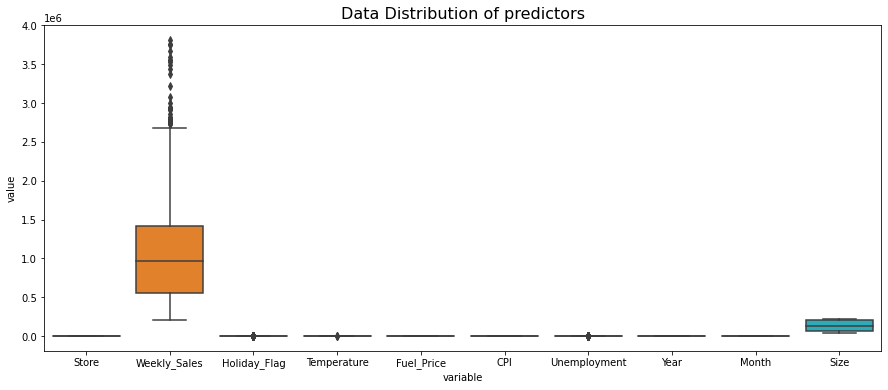

In [56]:
# Checking Outliers
fig, axs = plt.subplots(figsize=(15, 6))
sns.boxplot(data=df.melt(value_vars=['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
                                     'Year', 'Month', 'Size']),x='variable',y='value').set_title('Data Distribution of predictors', size=16);

In [57]:
#Check for non numerical variables to standardize data
if df.dtypes is "int64"==True:
  scaler = MinMaxScaler()
  df1=pd.DataFrame(scaler.fit_transform(df))
else:
  df1=df._get_numeric_data()
  scaler = MinMaxScaler()
  df1=pd.DataFrame((scaler.fit_transform(df1)), columns=df1.columns)

In [58]:
# PCA on predictor variables
from sklearn import decomposition
pca = decomposition.PCA ()
pca.fit(df1.iloc[:, :-3])
df1_transformed=pca.transform(df1.iloc[:, :-3])
explained_variance = pca.explained_variance_
proportion_variance = pca.explained_variance_ratio_
cummulative_proportion_of_variance = pca.explained_variance_ratio_.cumsum()

print("\n Explained variance : \n", explained_variance)
print("\n Proportion_variance : \n", proportion_variance)
print("\n cummulative proportion of variance : \n", cummulative_proportion_of_variance)


 Explained variance : 
 [0.16656424 0.08428639 0.06867785 0.0508329  0.03384515 0.02185941
 0.01969513]

 Proportion_variance : 
 [0.3736626  0.18908423 0.15406875 0.11403621 0.07592665 0.04903841
 0.04418316]

 cummulative proportion of variance : 
 [0.3736626  0.56274682 0.71681557 0.83085178 0.90677843 0.95581684
 1.        ]


# **Data Visualization**

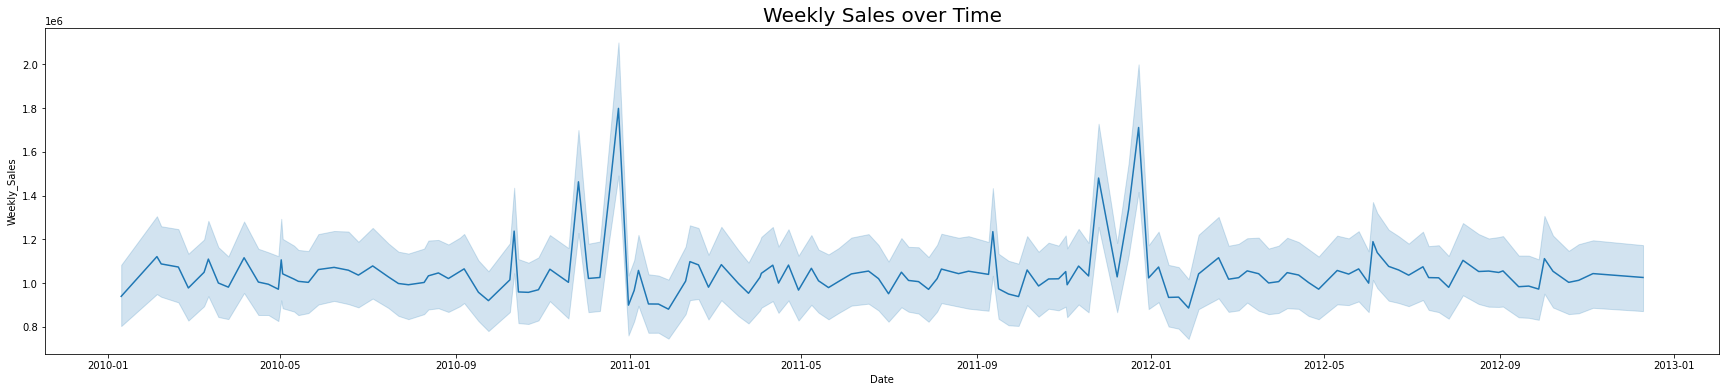

In [59]:
# Walmart Weekly Sales Trend
fig, axs = plt.subplots(figsize=(30, 6))
sns.lineplot(data=df, x="Date", y="Weekly_Sales", markers=True, dashes=False).set_title('Weekly Sales over Time', size = 20);

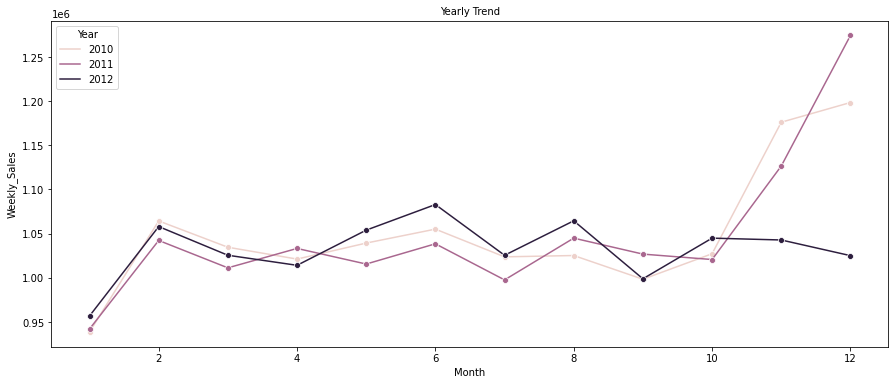

In [60]:
# Walmart Weekly Sales by Year and Month
fig, axs = plt.subplots(figsize=(15,6))
sns.lineplot(data=df, x="Month", y="Weekly_Sales", marker='o', dashes=False, ci=None, hue='Year').set_title('Yearly Trend', size=10);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


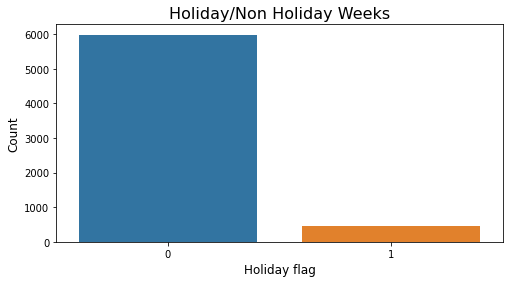

In [61]:
# Holiday/Non Holiday Weekly Data
fig, axs = plt.subplots(figsize=(8, 4));
sns.countplot(df.Holiday_Flag).set_title('Holiday/Non Holiday Weeks', size=16);
plt.xlabel("Holiday flag", size=12);
plt.ylabel("Count", size=12);

In [62]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month       Day       Event Type    Size  
0  211.096358         8.106  2010      5    Sunday         NaN    A  151315  
1  211.242170         8.106  2010     12  Thursday  Super Bowl    A  151315  
2  211.289143         8.106  2010      2    Friday         NaN    A  151315  
3  211.319643         8.106  2010      2    Friday         NaN    A  151315  
4  211.350143         8.106  2010      5    Monday         NaN    A  151315

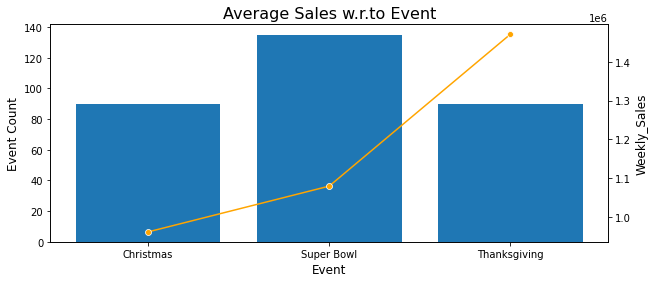

In [63]:
# Average Weekly Sales w.r.to Event
df_eve=df.groupby(['Event']).agg(Count=('Event','count'), WeeklySales=('Weekly_Sales','mean')).reset_index()
fig, ax = plt.subplots(figsize=(10,4))
plt.bar(data=df_eve, x='Event', height="Count");
ax.set_ylabel('Event Count', size=12)
ax.set_xlabel('Event', size=12)
ax2 = ax.twinx()
sns.lineplot(data=df_eve, x='Event', y="WeeklySales", marker='o', dashes=False, ci=None, color='orange',ax=ax2).set_title('Average Sales w.r.to Event', size=16);
ax2.set_ylabel('Weekly_Sales', size=12);

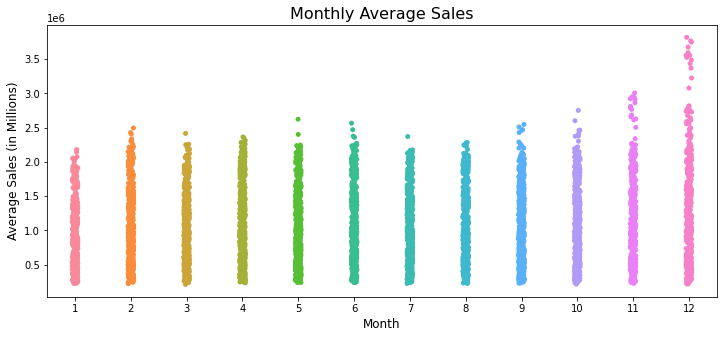

In [64]:
# Monthly Average Sales
fig, axs = plt.subplots(figsize=(12, 5))
ax = sns.stripplot(x="Month", y="Weekly_Sales", data=df, jitter=0.05).set_title('Monthly Average Sales', size=16);
plt.xlabel("Month", size=12)
plt.ylabel("Average Sales (in Millions)", size=12);

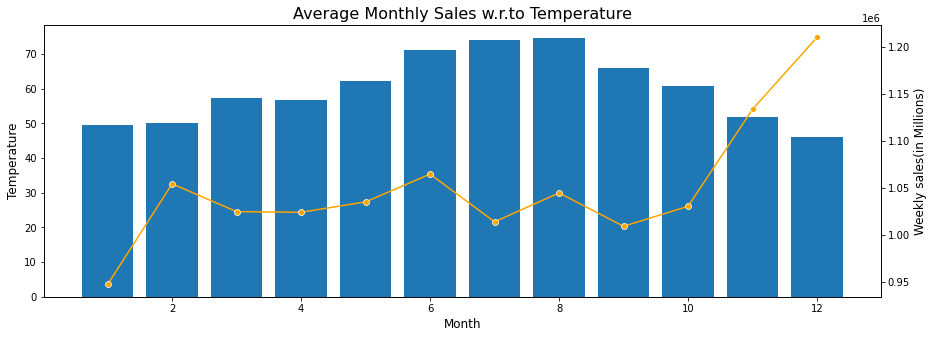

In [65]:
# Average Monthly Sales w.r.to Temperature
df_temp=pd.DataFrame(df.groupby('Month')['Temperature'].mean()).reset_index()
fig, ax = plt.subplots(figsize=(15,5))
plt.bar(data=df_temp, x='Month', height="Temperature");
ax.set_ylabel('Temperature', size=12)
ax.set_xlabel('Month', size=12)
ax2 = ax.twinx()
sns.lineplot(data=df, x='Month', y="Weekly_Sales", marker='o', dashes=False, ci=None, color='orange',ax=ax2).set_title('Average Monthly Sales w.r.to Temperature', size=16);
ax2.set_ylabel('Weekly sales(in Millions)', size=12);

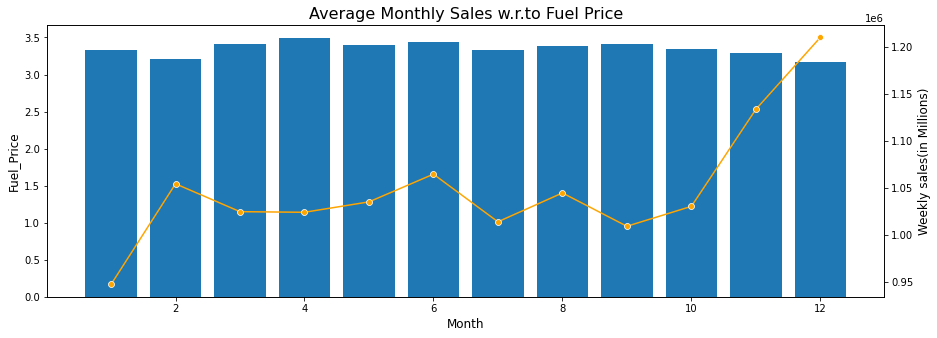

In [66]:
# Average Monthly Sales w.r.to Fuel
df_temp=pd.DataFrame(df.groupby('Month')['Fuel_Price'].mean()).reset_index()
fig, ax = plt.subplots(figsize=(15,5))
plt.bar(data=df_temp, x='Month', height="Fuel_Price");
ax.set_ylabel('Fuel_Price', size=12)
ax.set_xlabel('Month', size=12)
ax2 = ax.twinx()
sns.lineplot(data=df, x='Month', y="Weekly_Sales", marker='o', dashes=False, ci=None, color='orange',ax=ax2).set_title('Average Monthly Sales w.r.to Fuel Price', size=16);
ax2.set_ylabel('Weekly sales(in Millions)', size=12);

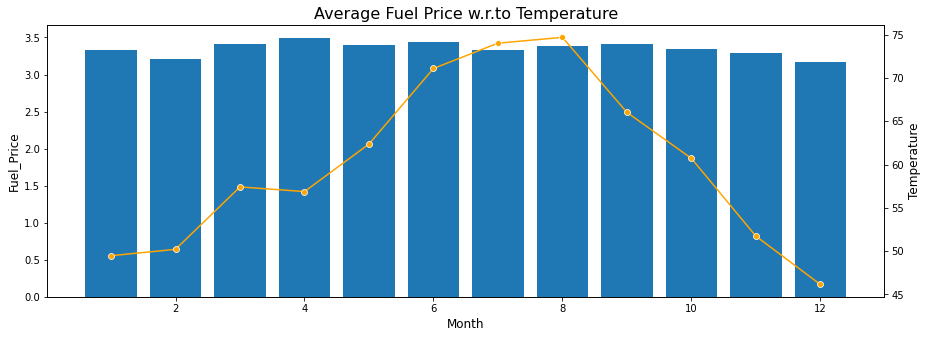

In [67]:
# Average Fuel Price w.r.to Temperature
df_temp=pd.DataFrame(df.groupby('Month')['Fuel_Price'].mean()).reset_index()
fig, ax = plt.subplots(figsize=(15,5))
plt.bar(data=df_temp, x='Month', height="Fuel_Price");
ax.set_ylabel('Fuel_Price', size=12)
ax.set_xlabel('Month', size=12)
ax2 = ax.twinx()
sns.lineplot(data=df, x='Month', y="Temperature", marker='o', dashes=False, ci=None, color='orange',ax=ax2).set_title('Average Fuel Price w.r.to Temperature', size=16);
ax2.set_ylabel('Temperature', size=12);

# **Data Partitioning**

In [68]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from  sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

Dropping Unnecessary Variables and Converting Categorical variables to Dummy variables using One-hot Encoding

In [69]:
df.drop(columns=['Date','Store'], inplace=True)
df_dummy = pd.get_dummies(df, columns=['Day', 'Event','Type'])

In [70]:
# Removing Outliers
Q1 = df_dummy['Weekly_Sales'].quantile(0.25)
Q3 = df_dummy['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

df_final = df_dummy[~((df_dummy['Weekly_Sales'] < (Q1 - 1.5 * IQR)) |(df_dummy['Weekly_Sales'] > (Q3 + 1.5 * IQR)))]

Q1 = df_final['Temperature'].quantile(0.25)
Q3 = df_final['Temperature'].quantile(0.75)
IQR = Q3 - Q1

df_final = df_final[~((df_final['Temperature'] < (Q1 - 1.5 * IQR)) |(df_final['Temperature'] > (Q3 + 1.5 * IQR)))]

Q1 = df_final['Fuel_Price'].quantile(0.25)
Q3 = df_final['Fuel_Price'].quantile(0.75)
IQR = Q3 - Q1

df_final = df_final[~((df_final['Fuel_Price'] < (Q1 - 1.5 * IQR)) |(df_final['Fuel_Price'] > (Q3 + 1.5 * IQR)))]

Q1 = df_final['CPI'].quantile(0.25)
Q3 = df_final['CPI'].quantile(0.75)
IQR = Q3 - Q1

df_final = df_final[~((df_final['CPI'] < (Q1 - 1.5 * IQR)) |(df_final['CPI'] > (Q3 + 1.5 * IQR)))]

In [71]:
# Standardizing Data
scalar = StandardScaler()
col = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Size']
df_final[col] = scalar.fit_transform(df_final[col])

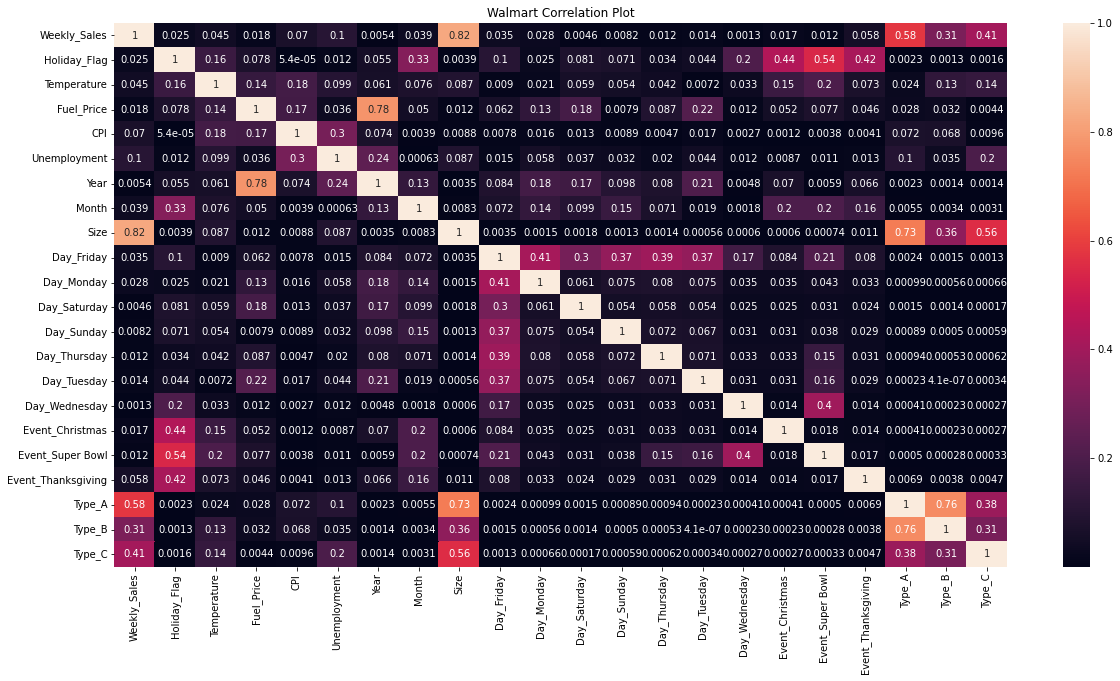

In [72]:
# Final Correlation Plot
fig, ax = plt.subplots(figsize=(20, 10))
dffinal_corr =df_final.corr()
sns.heatmap(dffinal_corr.abs(), annot=True).set(title="Walmart Correlation Plot");

In [73]:
df_final.head()

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price       CPI  \
0    1643690.90             0    -1.006065   -1.713656  1.002185   
1    1641957.44             1    -1.212839   -1.765864  1.005889   
2    1611968.17             0    -1.135571   -1.839824  1.007083   
3    1409727.59             0    -0.770996   -1.737585  1.007858   
4    1554806.68             0    -0.778069   -1.598366  1.008633   

   Unemployment      Year     Month      Size  Day_Friday  ...  Day_Sunday  \
0      0.055158 -1.213851 -0.438004  0.338399           0  ...           1   
1      0.055158 -1.213851  1.677890  0.338399           0  ...           0   
2      0.055158 -1.213851 -1.344816  0.338399           1  ...           0   
3      0.055158 -1.213851 -1.344816  0.338399           1  ...           0   
4      0.055158 -1.213851 -0.438004  0.338399           0  ...           0   

   Day_Thursday  Day_Tuesday  Day_Wednesday  Event_Christmas  \
0             0            0              0                0   
1             1            0              0                0   
2             0            0              0                0   
3             0            0              0                0   
4             0            0              0                0   

   Event_Super Bowl  Event_Thanksgiving  Type_A  Type_B  Type_C  
0                 0                   0       1       0       0  
1                 1                   0       1       0       0  
2                 0                   0       1       0       0  
3                 0                   0       1       0       0  
4                 0                   0       1       0       0  

[5 rows x 22 columns]

# **Data Partitioning**

In [74]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(df_final.iloc[:,1:], df_final.iloc[:, :1] , test_size=0.25, random_state=0)

In [75]:
print('X_train :' , X_train.shape )
print('X_test :' , X_test.shape )
print('y_train :' , y_train.shape )
print('y_test :' , y_test.shape )

X_train : (4798, 21)
X_test : (1600, 21)
y_train : (4798, 1)
y_test : (1600, 1)


# **Model Selection and Model Exploration**

**Linear Regression**

In [76]:
#Linear Regression
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
y_error =  y_test - y_pred_test

#Performance metrics 
print('explained_variance: ', metrics.explained_variance_score(y_test, y_pred_test))    
print('r2: ', metrics.r2_score(y_test, y_pred_test))
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred_test) )
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

explained_variance:  0.7080842720204916
r2:  0.7075877012132185
MAE:  230701.9007597854
MSE:  91597929648.73521
RMSE:  302651.49867254123


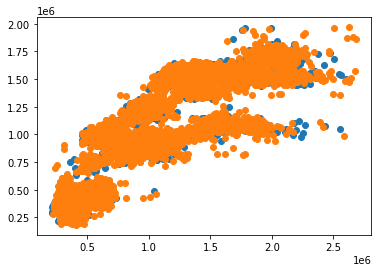

In [77]:
# Plotting training Data Prediction Results with Test Data
plt.scatter(y_test,y_pred_test);
plt.scatter(y_train,y_pred_train);

**Ridge Regression**

In [78]:
#Ridge Regression
reg = linear_model.Ridge(alpha=0.001)
reg.fit(X_train, y_train)
y_pred_Train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
y_error =  y_test - y_pred_test

#Performance metrics 
print('explained_variance: ', metrics.explained_variance_score(y_test, y_pred_test))    
print('r2: ', metrics.r2_score(y_test, y_pred_test))
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred_test) )
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

explained_variance:  0.7080843154987767
r2:  0.7075877442265006
MAE:  230701.86222367283
MSE:  91597916174.85738
RMSE:  302651.4764128161


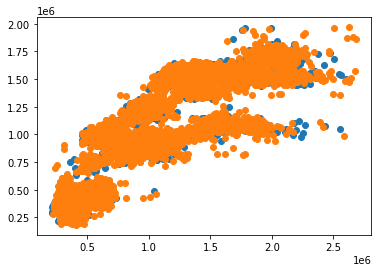

In [79]:
# Plotting training Data Prediction Results with Test Data
plt.scatter(y_test,y_pred_test);
plt.scatter(y_train,y_pred_train);

**Lasso Regression**

In [80]:
#Lasso regression, passing through regularization factor
Lasso_RMSE = []
for i in np.arange(0, 0.5, 0.001):
  Lasso_reg = linear_model.Lasso(alpha=i, max_iter=5000)
  Lasso_reg.fit(X_train, y_train)
  y_pred = Lasso_reg.predict(X_test)
  RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  Lasso_RMSE.append(RMSE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.100e+14, tolerance: 1.401e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random,

     lambda     Lasso_RMSE
498   0.498  302651.408895


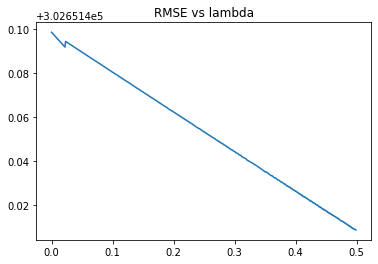

In [81]:
# Choosing lambda with minimun error out of all lambda values
df=pd.DataFrame({'lambda':np.arange(0, 0.5, 0.001), 'Lasso_RMSE':Lasso_RMSE})
print(df[df.Lasso_RMSE == df.Lasso_RMSE.min()])
sns.lineplot(x=np.arange(0, 0.5, 0.001), y=Lasso_RMSE).set_title("RMSE vs lambda");

In [82]:
# Lasso Regression with lambda 0.1( as there is no much difference in error values)
reg = Lasso(alpha=0.1, max_iter=5000)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

#Performance metrics 
print('explained_variance: ', metrics.explained_variance_score(y_test, y_pred_test))    
print('r2: ', metrics.r2_score(y_test, y_pred_test))
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred_test) )
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

explained_variance:  0.7080843218899395
r2:  0.7075877362544718
MAE:  230701.8172887907
MSE:  91597918672.0893
RMSE:  302651.48053840623


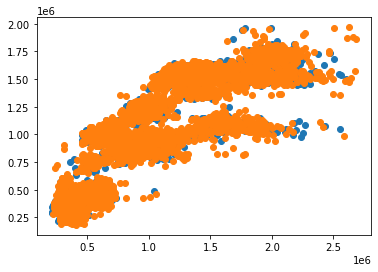

In [83]:
# Plotting training Data Prediction Results with Test Data
plt.scatter(y_test,y_pred_test);
plt.scatter(y_train,y_pred_train);

**Decision Tree**

In [84]:
# Decision tree
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train,y_train)
y_pred_train=dec_tree.predict(X_train)
y_pred_test=dec_tree.predict(X_test)

In [85]:
# Hyper parameters
parameters={"splitter":["best","random"],
            "max_depth" : range(1, 55)
            # "min_samples_leaf" : [1,2,3,4,5,6,7,8,9,10],
          #  "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
            }

In [86]:
# GridSearchCV to choose best parameters
tuning_model=GridSearchCV(dec_tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV 1/3] END max_depth=1, splitter=best;, score=-136703464951.495 total time=   0.0s
[CV 2/3] END max_depth=1, splitter=best;, score=-145927460264.434 total time=   0.0s
[CV 3/3] END max_depth=1, splitter=best;, score=-135481551435.492 total time=   0.0s
[CV 1/3] END max_depth=1, splitter=random;, score=-136703464951.495 total time=   0.0s
[CV 2/3] END max_depth=1, splitter=random;, score=-154454988509.505 total time=   0.0s
[CV 3/3] END max_depth=1, splitter=random;, score=-135481551435.492 total time=   0.0s
[CV 1/3] END max_depth=2, splitter=best;, score=-90292219301.033 total time=   0.0s
[CV 2/3] END max_depth=2, splitter=best;, score=-96914182733.794 total time=   0.0s
[CV 3/3] END max_depth=2, splitter=best;, score=-90442663452.989 total time=   0.0s
[CV 1/3] END max_depth=2, splitter=random;, score=-94548043927.785 total time=   0.0s
[CV 2/3] END max_depth=2, splitter=random;, score=-139224896829.307 total time=   0

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 55),
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [87]:
tuning_model.best_params_

{'max_depth': 26, 'splitter': 'random'}

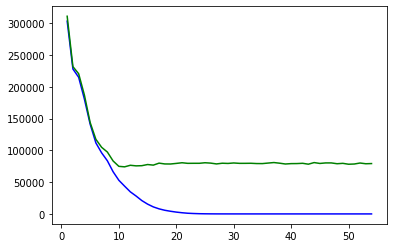

In [88]:
# Looping over Maximum depths between 1 and 55 and plotting Train vs Test Results
max_depths = range(1, 55)
training_error = []
test_errors = []
for max_depth in max_depths:
    dec_tree = DecisionTreeRegressor(max_depth=max_depth )
    dec_tree.fit(X_train,y_train)
    y_pred_train = dec_tree.predict(X_train)
    y_pred_test = dec_tree.predict(X_test)
    training_error.append(metrics.mean_absolute_error(y_train, y_pred_train))
    test_errors.append(metrics.mean_absolute_error(y_test, y_pred_test))
plt.plot(max_depths, training_error, color='blue', label='Training error');
plt.plot(max_depths, test_errors, color='green', label='Testing error');

In [89]:
# Decision Tree w.r.to best hyperbarameters
dec_tree = DecisionTreeRegressor(max_depth=10)
dec_tree.fit(X_train,y_train)
y_pred_train=dec_tree.predict(X_train)
y_pred_test=dec_tree.predict(X_test)

#Performance metrics 
print('explained_variance: ', metrics.explained_variance_score(y_test, y_pred_test))    
print('r2: ', metrics.r2_score(y_test, y_pred_test))
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred_test) )
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

explained_variance:  0.9500552049334471
r2:  0.9500380245053659
MAE:  73966.34646804635
MSE:  15650550730.789595
RMSE:  125102.16117553524


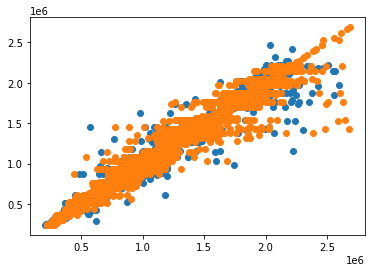

In [90]:
# Plotting training Data Prediction Results with Test Data
plt.scatter(y_test,y_pred_test);
plt.scatter(y_train,y_pred_train);

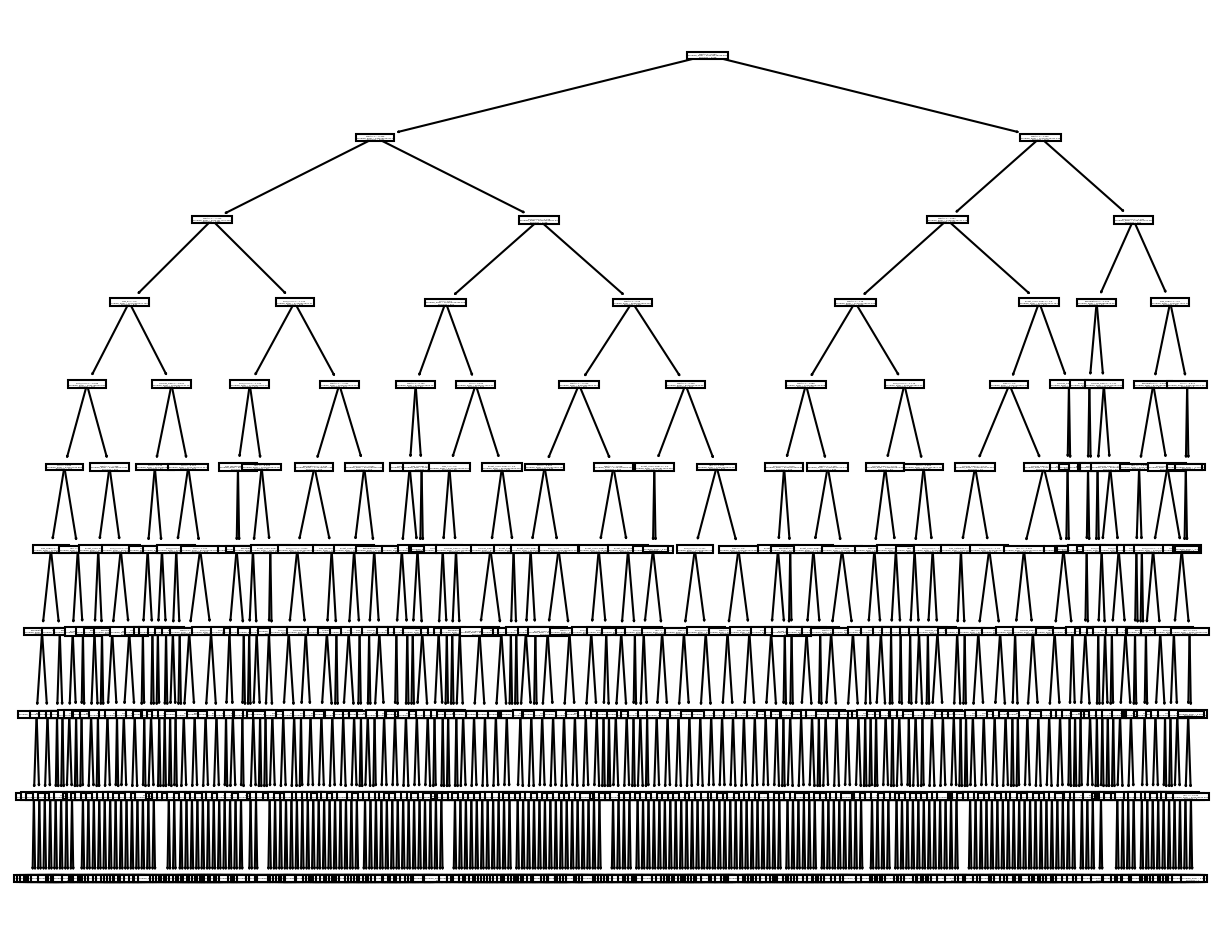

In [91]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(dec_tree, feature_names=df_final.iloc[:,:-1].columns);

**KNN Regressor**

In [92]:
# Knn Regressor
MSE_results = []
MSEerror=[]
for i in np.arange(1, 51, 1):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  MSE_results.append({'k': i,'MSE': metrics.mean_squared_error(y_test, y_pred)})
  MSEerror.append(metrics.mean_squared_error(y_test, y_pred))
MSE_results

[{'MSE': 83801030938.52856, 'k': 1},
 {'MSE': 64700920411.66412, 'k': 2},
 {'MSE': 64449264083.97189, 'k': 3},
 {'MSE': 64685427069.43516, 'k': 4},
 {'MSE': 65741817686.16271, 'k': 5},
 {'MSE': 64370097859.12498, 'k': 6},
 {'MSE': 64285573650.14841, 'k': 7},
 {'MSE': 65541269501.78904, 'k': 8},
 {'MSE': 65433002220.80741, 'k': 9},
 {'MSE': 66248897666.61886, 'k': 10},
 {'MSE': 67334409957.64582, 'k': 11},
 {'MSE': 68068854552.4405, 'k': 12},
 {'MSE': 68675726283.65268, 'k': 13},
 {'MSE': 69158568443.67978, 'k': 14},
 {'MSE': 70218163957.06837, 'k': 15},
 {'MSE': 70852329850.0517, 'k': 16},
 {'MSE': 71008433895.66473, 'k': 17},
 {'MSE': 71509057792.48463, 'k': 18},
 {'MSE': 71678130541.18195, 'k': 19},
 {'MSE': 71883928496.7447, 'k': 20},
 {'MSE': 71972045381.70586, 'k': 21},
 {'MSE': 72327656699.73152, 'k': 22},
 {'MSE': 72967444568.67607, 'k': 23},
 {'MSE': 73338112968.3857, 'k': 24},
 {'MSE': 73482105284.72777, 'k': 25},
 {'MSE': 74048991110.03795, 'k': 26},
 {'MSE': 74380204932.1962

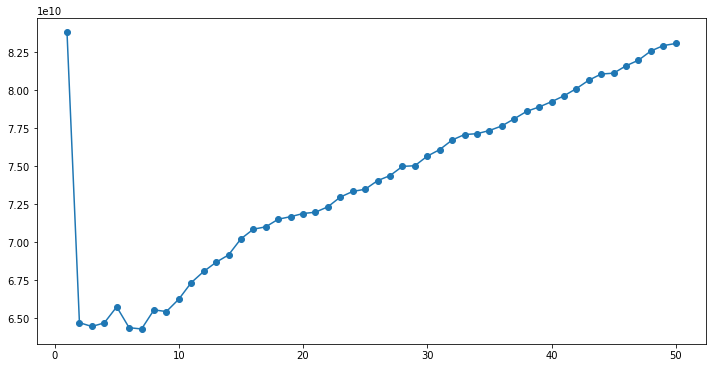

In [93]:
# Plotting Error w.r.to Neighbots
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51, 1), MSEerror,  marker='o');

In [94]:
# GridSearchCV to choose best parameters
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
k_range = list(np.arange(1, 51, 1))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


Streaming output truncated to the last 5000 lines.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classi

In [95]:
grid_search.best_params_

{'n_neighbors': 1}

In [96]:
# KNN w.r.to best hyperbarameters
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)

#Performance metrics 
print('r2: ', metrics.r2_score(y_test, y_pred_test))
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred_test) )
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

r2:  0.794255639421313
MAE:  156946.68582291665
MSE:  64449264083.97189
RMSE:  253868.59609642916


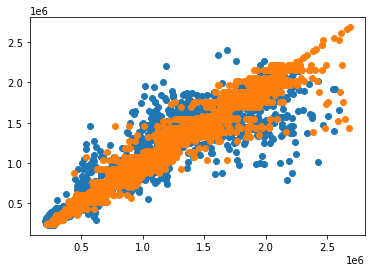

In [97]:
# Plotting training Data Prediction Results with Test Data
plt.scatter(y_test,y_pred_test);
plt.scatter(y_train,y_pred_train);

**Random Forest**

In [98]:
#Random forest regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train) 
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'], 
              'n_estimators': range(5, 100, 5)}

In [100]:
# GridSearchCV to choose best parameters
grid_search = GridSearchCV(estimator = rf_regressor, param_grid = param_grid,
                         cv = 10, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 10 folds for each of 114 candidates, totalling 1140 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 80}

In [101]:
# Random forest regressor with best hyper parameter value
rf_regressor = RandomForestRegressor(n_estimators = 75)
rf_regressor.fit(X_train, y_train.values.ravel())
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

#Performance metrics 
print('explained_variance: ', metrics.explained_variance_score(y_test, y_pred_test))    
print('r2: ', metrics.r2_score(y_test, y_pred_test))
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred_test) )
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

explained_variance:  0.9621990487277218
r2:  0.9621711330674028
MAE:  61548.156035916654
MSE:  11849863724.473562
RMSE:  108857.07934936322


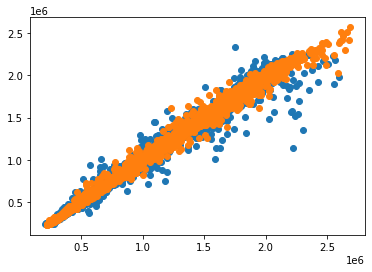

In [102]:
# Plotting training Data Prediction Results with Test Data
plt.scatter(y_test,y_pred_test);
plt.scatter(y_train,y_pred_train);

**Neural Networks**

In [103]:
# Neural Networks
model = Sequential()
model.add(Dense(units=5, input_dim=21, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

#Compile
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
240/240 [==============================] - 1s 2ms/step - loss: 1360757784576.0000
Epoch 2/50
240/240 [==============================] - 1s 2ms/step - loss: 1360752672768.0000
Epoch 3/50
240/240 [==============================] - 1s 2ms/step - loss: 1360749002752.0000
Epoch 4/50
240/240 [==============================] - 1s 2ms/step - loss: 1360746250240.0000
Epoch 5/50
240/240 [==============================] - 1s 2ms/step - loss: 1360742842368.0000
Epoch 6/50
240/240 [==============================] - 1s 2ms/step - loss: 1360740089856.0000
Epoch 7/50
240/240 [==============================] - 1s 2ms/step - loss: 1360736550912.0000
Epoch 8/50
240/240 [==============================] - 1s 2ms/step - loss: 1360734060544.0000
Epoch 9/50
240/240 [==============================] - 1s 2ms/step - loss: 1360731045888.0000
Epoch 10/50
240/240 [==============================] - 1s 2ms/step - loss: 1360727900160.0000
Epoch 11/50
240/240 [==============================] - 1s 2ms/step - 

In [104]:
y_prd_train = model.predict(X_train)
y_prd_test = model.predict(X_test)

#Performance metrics 
print('explained_variance: ', metrics.explained_variance_score(y_test, y_pred_test))    
print('r2: ', metrics.r2_score(y_test, y_pred_test))
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred_test) )
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

explained_variance:  0.9621990487277218
r2:  0.9621711330674028
MAE:  61548.156035916654
MSE:  11849863724.473562
RMSE:  108857.07934936322


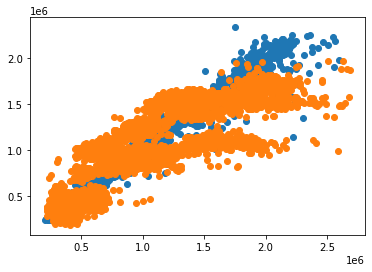

In [105]:
plt.scatter(y_test,y_pred_test)
plt.scatter(y_train,y_pred_Train)

# **Performance Evaluation**

In [106]:
Evaluation = pd.DataFrame(columns = ['Model', 'R2' ,'RMSE_test','RMSE_train', 'MSE', 'MAE'])

In [107]:
# Inserting Neural Networks Scores
data = {'Model': 'Neural Networks','R2' : metrics.r2_score(y_test, y_pred_test),
  'RMSE_test' : np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),
  'RMSE_train' : np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),
  'MSE' : metrics.mean_squared_error(y_test, y_pred_test),
  'MAE' : metrics.mean_absolute_error(y_test, y_pred_test)}

Evaluation = Evaluation.append(data, ignore_index = True)

In [108]:
models_list =[LinearRegression, Ridge, Lasso, DecisionTreeRegressor, KNeighborsRegressor, RandomForestRegressor]
models_names =['LinearRegression', 'Ridge', 'Lasso', 'DecisionTreeRegressor', 'KNeighborsRegressor', 'RandomForestRegressor']

for i in range(len(models_list)):
  model = models_list[i]
  model = model().fit(X_train, y_train.values.ravel())
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  R2 = metrics.r2_score(y_test, y_pred_test)
  RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
  RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
  MSE = metrics.mean_squared_error(y_test, y_pred_test)
  MAE = metrics.mean_absolute_error(y_test, y_pred_test)
  Evaluation = Evaluation.append({'Model':models_names[i],'R2': R2, 'RMSE_test':RMSE_test, 'RMSE_train' : RMSE_train,'MSE':MSE, 'MAE':MAE}, ignore_index=True)

In [109]:
Evaluation

Model        R2      RMSE_test     RMSE_train  \
0        Neural Networks  0.962171  108857.079349   41075.511833   
1       LinearRegression  0.707588  302651.498673  295889.753436   
2                  Ridge  0.707625  302632.126834  295892.095170   
3                  Lasso  0.707588  302651.319810  295889.756143   
4  DecisionTreeRegressor  0.935633  141996.515127       0.000000   
5    KNeighborsRegressor  0.790129  256401.672549  191516.145239   
6  RandomForestRegressor  0.963098  107515.237816   41175.262941   

            MSE            MAE  
0  1.184986e+10   61548.156036  
1  9.159793e+10  230701.900760  
2  9.158620e+10  230666.276197  
3  9.159782e+10  230701.090236  
4  2.016301e+10   80213.672081  
5  6.574182e+10  163776.251062  
6  1.155953e+10   60612.651460

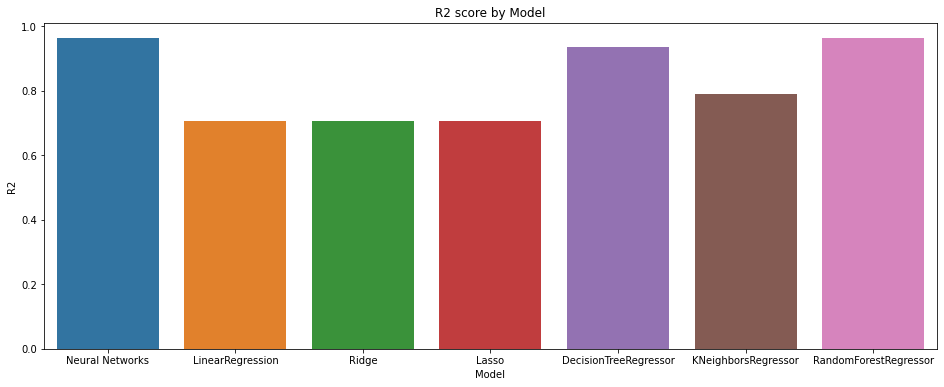

In [110]:
# Comparing the Model Performance
plt.figure(figsize=(16, 6))
sns.barplot( x=Evaluation['Model'], y=Evaluation['R2']).set_title("R2 score by Model");

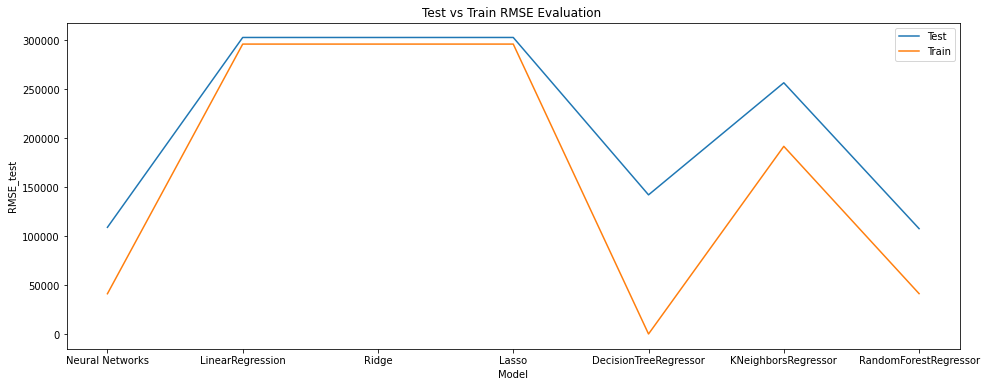

In [111]:
# Test vs Train RMSE Evaluation
plt.figure(figsize=(16, 6))
sns.lineplot( x=Evaluation['Model'], y=Evaluation['RMSE_test'], label='Test');
sns.lineplot( x=Evaluation['Model'], y=Evaluation['RMSE_train'], label='Train').set_title("Test vs Train RMSE Evaluation ");

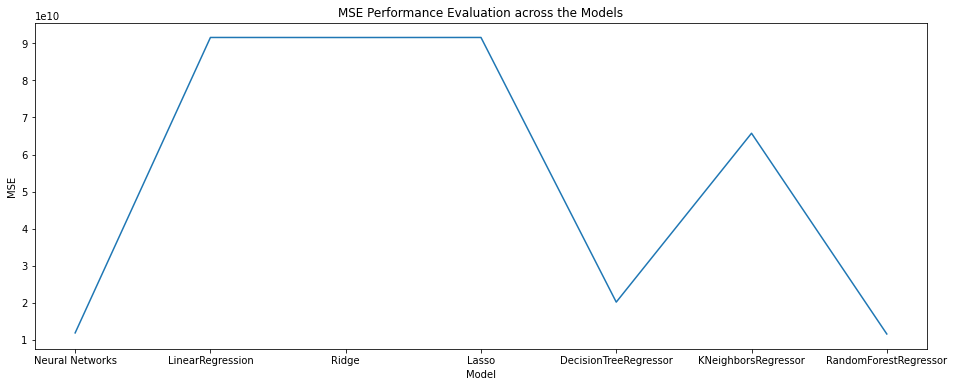

In [112]:
# MSE Performance Evaluation across the Models
plt.figure(figsize=(16, 6))
sns.lineplot( x=Evaluation['Model'], y=Evaluation['MSE']).set_title("MSE Performance Evaluation across the Models");

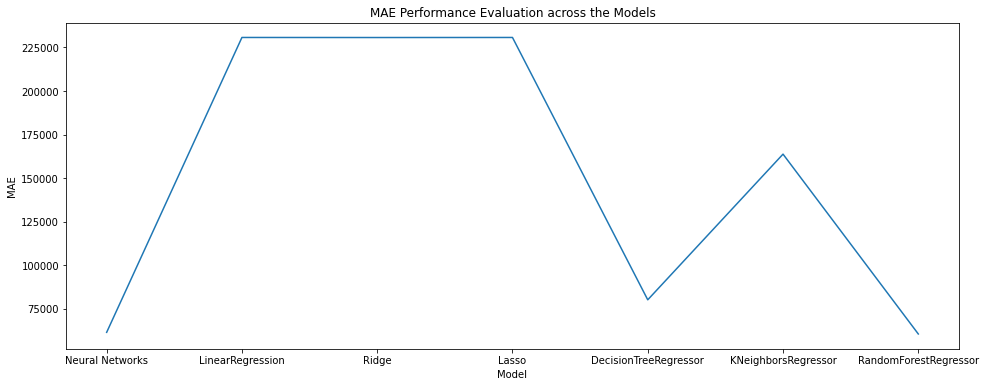

In [113]:
# MAE Performance Evaluation across the Models
plt.figure(figsize=(16, 6))
sns.lineplot( x=Evaluation['Model'], y=Evaluation['MAE']).set_title("MAE Performance Evaluation across the Models");